# Load packages and data

Pre-process the data to have a general sense of the data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [ ]:
# load the data
data = pd.read_excel('INF2178_A1_data.xlsx')
data.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [ ]:
# to have a general sense of the entire dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

In [ ]:
# select all categorical variable and investigate how many different
# categories each of them has
category = ['ORGANIZATION_NAME', 'SECTOR', 'PROGRAM_MODEL',
            'OVERNIGHT_SERVICE_TYPE', 'PROGRAM_AREA', 'CAPACITY_TYPE']

# print them out
for cat in category:
    unique_cat = data[cat].dropna().unique()
    print(cat + ' has ' + str(len(unique_cat)) + ' categories:')
    for factor in unique_cat[:-1]:
        print(factor, end = ", ")
    print(unique_cat[-1])
    print('\n')

ORGANIZATION_NAME has 35 categories:
COSTI Immigrant Services, Christie Ossington Neighbourhood Centre, Christie Refugee Welcome Centre, Inc., City of Toronto, Cornerstone Place, Covenant House Toronto, Dixon Hall, Eva's Initiatives, Fife House Foundation, Fred Victor Centre, Friends of Ruby, Good Shepherd Ministries, Homes First Society, Horizon for Youth, Kennedy House Youth Services, Margaret's Housing and Community Support Services, Na-Me-Res (Native Men's Residence), Native Child & Family Services Toronto, Society of St.Vincent De Paul, St. Felix Social Ministries Outreach, St. Simon's Shelter Inc., Street Haven At The Crossroads, The MUC Shelter Corporation, The Salvation Army of Canada, The Scott Mission Inc., Toronto Community Hostel, Turning Point Youth Services, Warden Woods Community Centre, Women's Hostels Inc., WoodGreen Red Door Family Shelter, YMCA of Greater Toronto, YWCA Toronto, Youth Without Shelter, YouthLink, Sistering: A Women's Place


SECTOR has 5 categories:
Fa

# T-test pre-processing

In [ ]:
# select the variable of interest
df = data[['CAPACITY_TYPE', 'SECTOR', 'PROGRAM_MODEL', 'SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']]

In [ ]:
# calculate the occupied rate for bed and room separately
df['OCCUPIED_BEDS_RATE'] = df['OCCUPIED_BEDS'] / df['CAPACITY_ACTUAL_BED']
df['OCCUPIED_ROOM_RATE'] = df['OCCUPIED_ROOMS'] / df['CAPACITY_ACTUAL_ROOM']

# combine the rate into 1 column
df['OCCUPIED_RATE'] = df['OCCUPIED_BEDS_RATE'].combine_first(df['OCCUPIED_ROOM_RATE'])
df.head()

<ipython-input-95-c2795a1cd5ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OCCUPIED_BEDS_RATE'] = df['OCCUPIED_BEDS'] / df['CAPACITY_ACTUAL_BED']
<ipython-input-95-c2795a1cd5ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OCCUPIED_ROOM_RATE'] = df['OCCUPIED_ROOMS'] / df['CAPACITY_ACTUAL_ROOM']
<ipython-input-95-c2795a1cd5ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,CAPACITY_TYPE,SECTOR,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPIED_BEDS_RATE,OCCUPIED_ROOM_RATE,OCCUPIED_RATE
0,Room Based Capacity,Families,Emergency,74,NaN,NaN,29.0,26.0,NaN,0.896552,0.896552
1,Room Based Capacity,Mixed Adult,Emergency,3,NaN,NaN,3.0,3.0,NaN,1.000000,1.000000
2,Room Based Capacity,Men,Emergency,24,NaN,NaN,28.0,23.0,NaN,0.821429,0.821429
3,Room Based Capacity,Mixed Adult,Emergency,25,NaN,NaN,17.0,17.0,NaN,1.000000,1.000000
4,Room Based Capacity,Women,Emergency,13,NaN,NaN,14.0,13.0,NaN,0.928571,0.928571


## CAPACITY_TYPE and OCCUPIED_RATE

In [ ]:
# define a function to avoid repetitive work
# get_summary_statistics calculates the mean, median, min/max, q1, q3, iqr
def get_summary_statistics(name):

    dataset = df[name].dropna()
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)
    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)

    print(name + ' summary statistics:')
    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)
    print('\n')

In [ ]:
# get summary statistics for occuipied rate of bed and room
get_summary_statistics('OCCUPIED_BEDS_RATE')
get_summary_statistics('OCCUPIED_ROOM_RATE')

OCCUPIED_BEDS_RATE summary statistics:
Min: 0.02
Mean: 0.93
Max: 1.0
25th percentile: 0.9
Median: 1.0
75th percentile: 1.0
Interquartile range (IQR): 0.1


OCCUPIED_ROOM_RATE summary statistics:
Min: 0.01
Mean: 0.93
Max: 1.01
25th percentile: 0.96
Median: 1.0
75th percentile: 1.0
Interquartile range (IQR): 0.04




In [ ]:
# select the occupied rate for each capacity category
group_room = df[df['CAPACITY_TYPE'] == 'Room Based Capacity']['OCCUPIED_RATE']
group_bed = df[df['CAPACITY_TYPE'] == 'Bed Based Capacity']['OCCUPIED_RATE']

# Perform the two-sample t-test
t_stat, p_val = stats.ttest_ind(group_room, group_bed, nan_policy='omit')

# The result
print('2-sample t-test result:')
print('t-statistic:', t_stat)
print('p-value:', p_val)

2-sample t-test result:
t-statistic: 4.854104599422829
p-value: 1.2128933183471424e-06


### Visualization

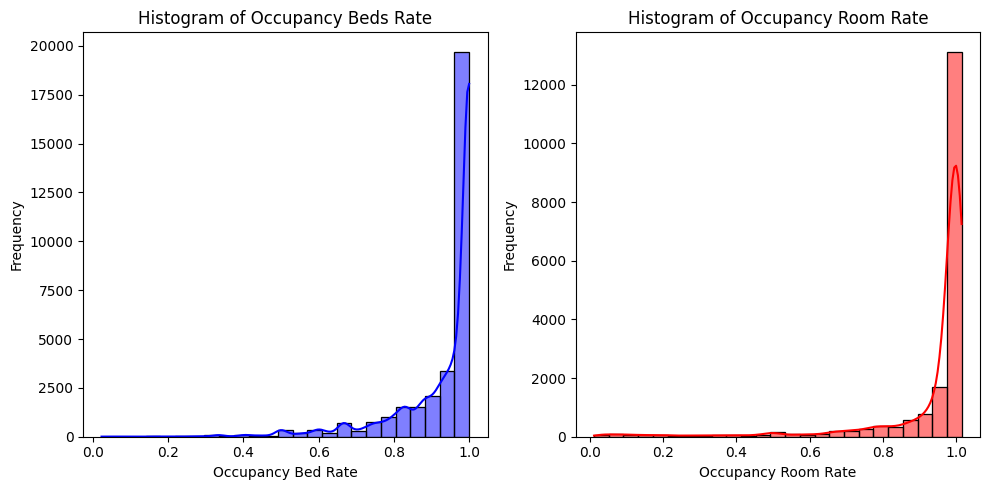

In [ ]:
# make the 2 plots on 1 frame
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# plot the first histogram plot
sns.histplot(df['OCCUPIED_BEDS_RATE'], kde=True, bins=25, color='blue', ax=axes[0])
# define the title, x label and y label for the first plot
axes[0].set_title('Histogram of Occupancy Beds Rate')
axes[0].set_xlabel('Occupancy Bed Rate')
axes[0].set_ylabel('Frequency')

# plot the second histogram plot
sns.histplot(df['OCCUPIED_ROOM_RATE'], kde=True, bins=25, color='red', ax=axes[1])
# define the title, x label and y label for the second plot
axes[1].set_title('Histogram of Occupancy Room Rate')
axes[1].set_xlabel('Occupancy Room Rate')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

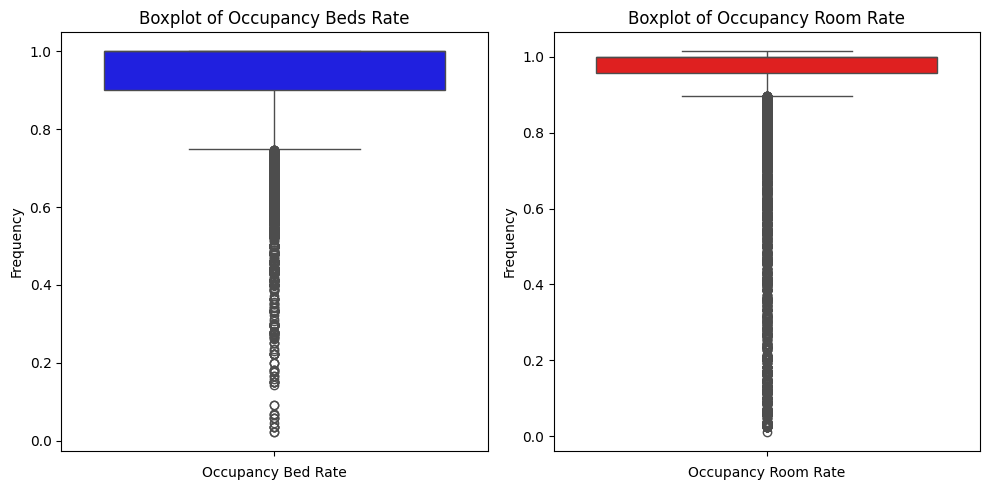

In [ ]:
# make the 2 plots on 1 frame
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# plot the first boxplot
sns.boxplot(df['OCCUPIED_BEDS_RATE'], color='blue', ax=axes[0])
# define the title, x label and y label for the first plot
axes[0].set_title('Boxplot of Occupancy Beds Rate')
axes[0].set_xlabel('Occupancy Bed Rate')
axes[0].set_ylabel('Frequency')

# plot the second boxplot
sns.boxplot(df['OCCUPIED_ROOM_RATE'], color='red', ax=axes[1])
# define the title, x label and y label for the second plot
axes[1].set_title('Boxplot of Occupancy Room Rate')
axes[1].set_xlabel('Occupancy Room Rate')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Weltch T-test

It seems the variance are not equal, we should use Weltch t-test instead

In [ ]:
# Welch's t-test
t_stat, p_val = stats.ttest_ind(group_room, group_bed, equal_var=False, nan_policy='omit')

# The result
print('Welch\'s t-test result:')
print('t-statistic:', t_stat)
print('p-value:', p_val)

Welch's t-test result:
t-statistic: 4.498751771925636
p-value: 6.860477551487939e-06


## SECTOR: Men vs Women and SERVICE_USER_COUNT



In [ ]:
# get the service user count for men and women separately
group_men = df[df['SECTOR'] == 'Men']['SERVICE_USER_COUNT']
group_women = df[df['SECTOR'] == 'Women']['SERVICE_USER_COUNT']

In [ ]:
# define a function to avoid repetitive work
# get_summary_statistics calculates the mean, median, min/max, q1, q3, iqr

def get_summary_statistics(dataset):

    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)
    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)

    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)
    print('\n')

In [ ]:
# get summary statistics for service user count of men and women
print('Service User Count for Men Sector')
get_summary_statistics(group_men)
print('Service User Count for Women Sector')
get_summary_statistics(group_women)

Service User Count for Men Sector
Min: 1
Mean: 39.87
Max: 234
25th percentile: 19.0
Median: 32.0
75th percentile: 48.0
Interquartile range (IQR): 29.0


Service User Count for Woen Sector
Min: 1
Mean: 28.66
Max: 100
25th percentile: 15.0
Median: 25.0
75th percentile: 37.0
Interquartile range (IQR): 22.0




In [ ]:
# Perform the two-sample t-test
t_stat, p_val = stats.ttest_ind(group_men, group_women, nan_policy='omit')

# The result
print('2-sample t-test result:')
print('t-statistic:', t_stat)
print('p-value:', p_val)

2-sample t-test result:
t-statistic: 28.24955042305982
p-value: 2.022346382679794e-172


### Visualization

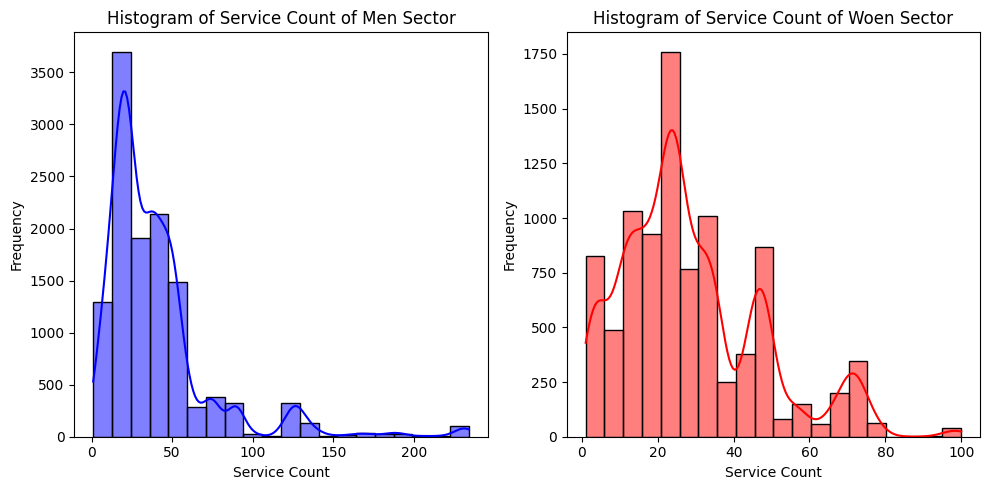

In [ ]:
# make the 2 plots on 1 frame
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# plot the first histogram plot
sns.histplot(group_men, kde=True, bins=20, color='blue', ax=axes[0])
# define the title, x label and y label for the first plot
axes[0].set_title('Histogram of Service Count of Men Sector')
axes[0].set_xlabel('Service Count')
axes[0].set_ylabel('Frequency')

# plot the second histogram plot
sns.histplot(group_women, kde=True, bins=20, color='red', ax=axes[1])
# define the title, x label and y label for the second plot
axes[1].set_title('Histogram of Service Count of Women Sector')
axes[1].set_xlabel('Service Count')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

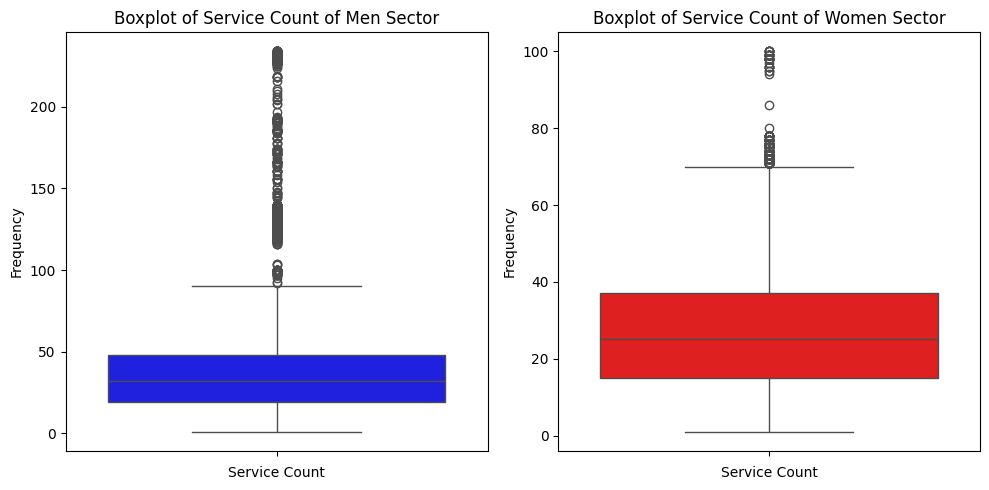

In [ ]:
# make the 2 plots on 1 frame
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# plot the first boxplot
sns.boxplot(group_men, color='blue', ax=axes[0])
# define the title, x label and y label for the first plot
axes[0].set_title('Boxplot of Service Count of Men Sector')
axes[0].set_xlabel('Service Count')
axes[0].set_ylabel('Frequency')

# plot the second boxplot
sns.boxplot(group_women, color='red', ax=axes[1])
# define the title, x label and y label for the second plot
axes[1].set_title('Boxplot of Service Count of Women Sector')
axes[1].set_xlabel('Service Count')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Welch's T-test

It seems the variance are not equal, we should use Weltch t-test instead

In [ ]:
# Welch's t-test
t_stat, p_val = stats.ttest_ind(group_men, group_women, equal_var=False, nan_policy='omit')

# The result
print('Welch\'s t-test result:')
print('t-statistic:', t_stat)
print('p-value:', p_val)

Welch's t-test result:
t-statistic: 30.50421164151915
p-value: 1.0532742925183108e-199
